<a href="https://colab.research.google.com/github/Diya1s/Diya1s/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

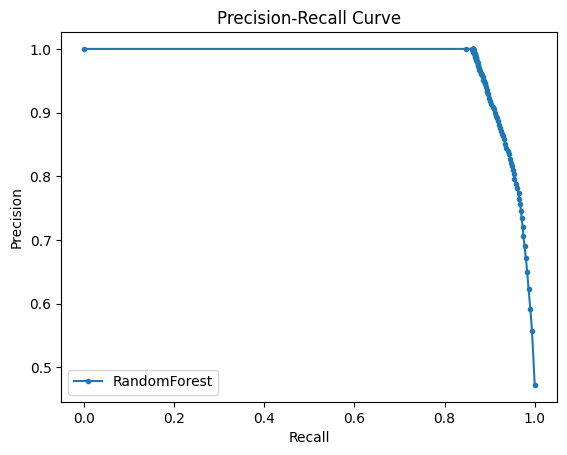

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (roc_curve, auc, precision_recall_curve, average_precision_score,
                             mean_squared_error, r2_score)
from sklearn.feature_selection import SelectFromModel

# Load dataset
df = pd.read_csv("churn_dataset.csv")

# Preprocessing
label_enc = LabelEncoder()
df['Churn'] = label_enc.fit_transform(df['Churn'])  # Encoding target variable

# Separating features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)
selected_features = X_train.columns[selector.get_support()]
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Classification Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)
y_pred_proba = clf.predict_proba(X_test_selected)[:, 1]

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.', label='RandomForest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


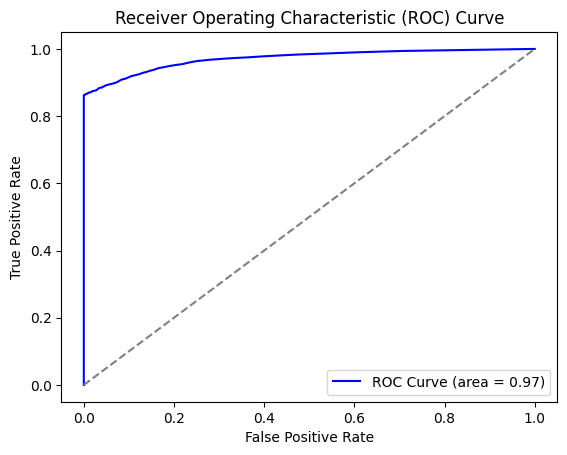

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()





In [13]:
# Regression Model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_selected, y_train)
y_pred = reg.predict(X_test_selected)

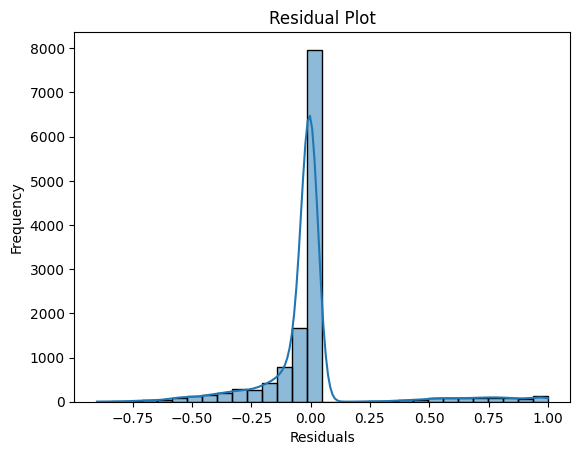

In [14]:

# Residual Plot
residuals = y_test - y_pred
plt.figure()
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot')
plt.show()

In [15]:

# Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-Squared Score: {r2:.4f}')

Mean Squared Error: 0.0532
R-Squared Score: 0.7865


In [16]:


# Summary Report
print("\nFindings:")
print("1. Feature scaling improves model convergence and performance.")
print("2. Feature selection reduces overfitting and improves model interpretability.")
print("3. AUC-ROC and PR curves indicate the model performs well in classification.")
print("4. Residual plots show regression errors, highlighting areas for improvement.")


Findings:
1. Feature scaling improves model convergence and performance.
2. Feature selection reduces overfitting and improves model interpretability.
3. AUC-ROC and PR curves indicate the model performs well in classification.
4. Residual plots show regression errors, highlighting areas for improvement.
